In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('police_project.csv')

In [3]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.describe(include='all')

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
count,91741,91741,0.0,86406,86414.000000,86120.000000,86408,86408,86408,91741,3196,86408,86408,86408,91741
unique,3768,1436,NaN,2,NaN,NaN,5,12,6,2,24,6,2,5,2
top,2012-01-11,11:00,NaN,M,NaN,NaN,White,Speeding,Speeding,False,Incident to Arrest,Citation,False,0-15 Min,False
freq,69,323,NaN,62895,NaN,NaN,62158,48463,48463,88545,1219,77006,83479,69543,90926
mean,NaN,NaN,NaN,NaN,1970.491228,34.011333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,110.914909,12.738564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1967.000000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1980.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1987.000000,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
stop_date             91741 non-null object
stop_time             91741 non-null object
county_name           0 non-null float64
driver_gender         86406 non-null object
driver_age_raw        86414 non-null float64
driver_age            86120 non-null float64
driver_race           86408 non-null object
violation_raw         86408 non-null object
violation             86408 non-null object
search_conducted      91741 non-null bool
search_type           3196 non-null object
stop_outcome          86408 non-null object
is_arrested           86408 non-null object
stop_duration         86408 non-null object
drugs_related_stop    91741 non-null bool
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+ MB


In [135]:
df.head(5)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Removing country column since it contains all missing values

In [7]:
df['county_name'].isnull().value_counts()

True    91741
Name: county_name, dtype: int64

In [8]:
df.drop('county_name', axis=1, inplace=True)

In [9]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Number of male and female drivers

In [10]:
male = df.driver_gender[df['driver_gender'] == 'M']

In [11]:
female = df.driver_gender[df['driver_gender'] == 'F']

In [12]:
male_count = male.notnull().value_counts()
male_count

True    62895
Name: driver_gender, dtype: int64

In [13]:
female_count = female.notnull().value_counts()
female_count

True    23511
Name: driver_gender, dtype: int64

In [14]:
total = male.notnull().value_counts() + female.notnull().value_counts()
total

True    86406
Name: driver_gender, dtype: int64

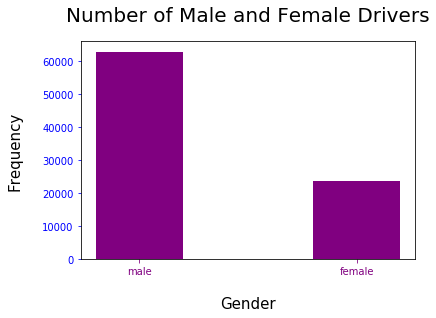

In [15]:
plt.bar(('male', 'female'), (male_count[True], female_count[True]), color='purple', align='center', width=0.4)
plt.title('Number of Male and Female Drivers', size=20, pad=20)
plt.xlabel('Gender', size=15, labelpad=20)
plt.ylabel('Frequency', size=15, labelpad=20)
plt.tick_params(axis='x', colors='purple')
plt.tick_params(axis='y', colors='blue')

# Age of Drivers

In [16]:
df.driver_age.head()

0    20.0
1    40.0
2    33.0
3    19.0
4    21.0
Name: driver_age, dtype: float64

In [17]:
age_drivers = df.driver_age.notnull().value_counts()
age_drivers

True     86120
False     5621
Name: driver_age, dtype: int64

In [18]:
age = np.arange(1, 101)

In [19]:
age

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [42]:
ages = np.array(df.driver_age[df['driver_age'].notnull()])

In [43]:
ages

array([20., 40., 33., ..., 23., 22., 56.])

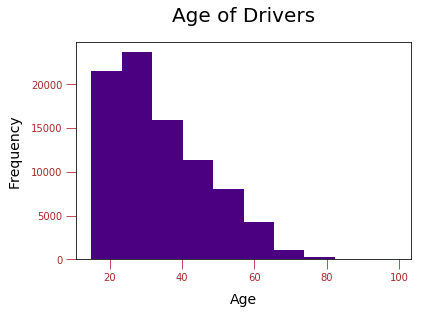

In [196]:
plt.hist(ages, bins=10, color='indigo')
plt.title('Age of Drivers',pad=20, size=20)
plt.xlabel('Age', labelpad=10, size=14)
plt.ylabel('Frequency', labelpad=10, size=14)
plt.tick_params(axis='both', colors='brown', size=10)

# Male Drivers Age

In [105]:
male_count[True]

62895

In [202]:
male_drivers_age = df[(df['driver_age'].notnull()) & (df['driver_gender'] == 'M')]

In [203]:
male_drivers_age.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
5,2005-03-23,09:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False


(array([1.2005e+04, 1.8174e+04, 1.1125e+04, 8.8460e+03, 6.9050e+03,
        3.8010e+03, 1.3370e+03, 3.7000e+02, 7.6000e+01, 1.0000e+01]),
 array([15. , 22.9, 30.8, 38.7, 46.6, 54.5, 62.4, 70.3, 78.2, 86.1, 94. ]),
 <a list of 10 Patch objects>)

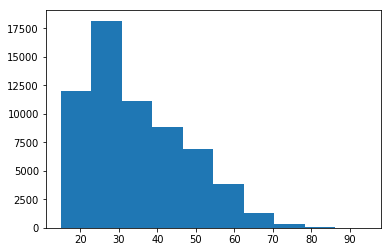

In [204]:
plt.hist(male_drivers_age['driver_age'])

# Female Driver Age

In [207]:
female_count[True]

23511

In [208]:
female_drivers_age = df[(df['driver_age'].notnull()) & (df['driver_gender'] == 'F')]

In [210]:
female_drivers_age.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,2005-06-06,13:20,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
11,2005-07-13,19:00,F,1966.0,39.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
13,2005-07-18,19:30,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
19,2005-07-24,20:10,F,1958.0,47.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


(array([6.766e+03, 6.643e+03, 4.127e+03, 2.895e+03, 1.911e+03, 8.680e+02,
        2.050e+02, 4.300e+01, 5.000e+00, 1.000e+00]),
 array([15. , 23.4, 31.8, 40.2, 48.6, 57. , 65.4, 73.8, 82.2, 90.6, 99. ]),
 <a list of 10 Patch objects>)

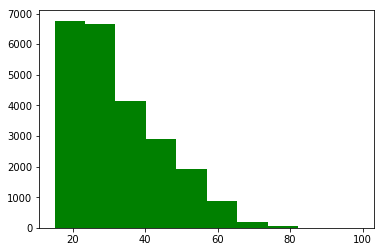

In [220]:
plt.hist(female_drivers_age.driver_age, color='green')

# Major Violations

In [222]:
df.violation.value_counts()

Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [223]:
violation_names = ['Speeding', 'Moving violation', 'Equipment', 'Other', 'Registration/plates', 'Seat belt']

In [238]:
violations = df.violation[df.violation.notnull()]

In [241]:
violations = violations.value_counts()

In [248]:
violations.index

Index(['Speeding', 'Moving violation', 'Equipment', 'Other',
       'Registration/plates', 'Seat belt'],
      dtype='object')

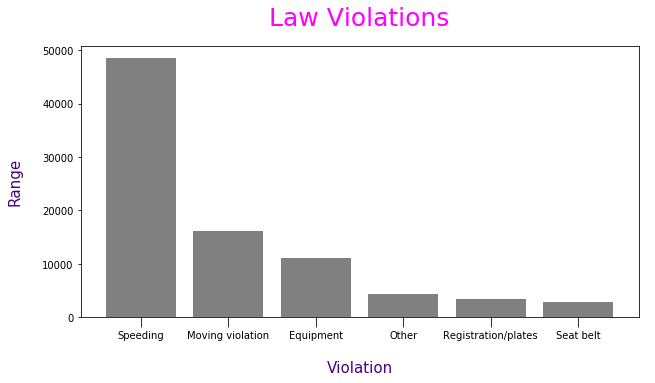

In [285]:
plt.figure(figsize=(10,5))
plt.bar(violations.index, violations, color='grey', align='center')
plt.title('Law Violations', pad=20, size=25, color='magenta')
plt.xlabel('Violation', labelpad=20, size=15, color='indigo')
plt.ylabel('Range', labelpad=20, size=15, color='indigo')
plt.tick_params(axis='x', size=10)